# Interfacing R via magic command

#### *Qianjiang Hu   &nbsp;&nbsp;&nbsp;  2021-02-25*

There is a lot of interest and debate over what is the best language for data science between R and Python. Sine, both of them present advantages and disadvantages, why don't we use both? Fortunately, Ipython and rpy2 offer an interactive environment via Rmagic.

### Enable the interactive R magic

Enable the R magic by executing `%load_ext rpy2.ipython`, not necessary if you have done this. *(need to install `rpy2` firstly)*

In [1]:
%load_ext rpy2.ipython

###  Line and Cell magics

In general, `%R` is the line magic, executing R magic in the line; while `%%R` is the cell magics, executing R magic in a block.

In [2]:
# Multiple R expressions can be executed by joining them with semicolons:

%R a  <- rnorm(10); print(sd(a)); print(mean(a)) # R kernel

## the following codes are still executed in Python Kernel
import numpy as np
b = np.array([1,2,3,4])

print(np.mean(b))

[1] 0.6216967
[1] 0.4304756
2.5


In [3]:
%%R
c <- rnorm(10)
d <- c*10
print(c)
print(d)

 [1]  1.1299197 -1.1032857  0.3145644 -0.2571288  0.1727749  1.4199051
 [7] -1.0870211 -0.4109811 -1.0184317  0.4709885
 [1]  11.299197 -11.032857   3.145644  -2.571288   1.727749  14.199051
 [7] -10.870211  -4.109811 -10.184317   4.709885


###### optional arguments:
 `-i` &nbsp;&nbsp;&nbsp; INPUT  
 Objects that will be loaded into R kernel from Python Kernel.  
 Multiple object names can be loaded, separated by commas with no whitespace.

 `-o` &nbsp;&nbsp;&nbsp; OUTPUT  
 Names of variables that will be export to Python Kernel from R kernel.  
 Multiple object names can be exported, separated by commas with no whitespace.

 `-n` &nbsp;&nbsp;&nbsp; NORETURN  
 Force the magic to not return anything.

`-w` &nbsp;&nbsp;&nbsp;WIDTH  
Width of plotting device in R.

`-h` &nbsp;&nbsp;&nbsp;HEIGHT  
Height of plotting device in R.

`-p` &nbsp;&nbsp;&nbsp;POINTSIZE  
Pointsize of plotting device in R.

`-b` &nbsp;&nbsp;&nbsp;BG  
Background of plotting device in R.

##### alternatives for `-i` and `-o`

`%Rpush` and `%Rpull` are the alternatives of `-i` and `-o` respectively.

##### %Rpush

`%Rpush` all objects followed will be loaded into R kernel from Python Kernel.  
Multiple object names can be loaded, **separated by whitespace**.

##### %Rpull

`%Rpull` all objects followed will be export to Python Kernel from R kernel.  
Multiple object names can be exported, **separated by whitespace**

In [4]:
## example of using %Rpush
y = np.array([3,4,5])
z = np.array([6,7,8])
%Rpush y z
%R y+z

array([ 9, 11, 13], dtype=int32)

In [5]:
## example of using %Rpush
%R yz <- y+z
%Rpull yz
np.mean(yz)

11.0

In [6]:
%%R
a <- rnorm(10)
a

 [1]  1.406497443  0.045380741  0.683356013  0.025033272 -0.544757834
 [6] -0.005542586  0.827372126 -0.004161178  0.173226014  0.305845155


### plots

In [8]:
import pandas as pd
import numpy as np
df = pd.DataFrame({
    'Raining_ratio': [0, 1, 2, 3, 4, 5, 6, 7, 8, 2],
    'humidity': [20, 50, 64, 80, 75, 83, 0, 10, 0, 50]})
df.transpose()

,0,1,2,3,4,5,6,7,8,9
Raining_ratio,0,1,2,3,4,5,6,7,8,2
humidity,20,50,64,80,75,83,0,10,0,50


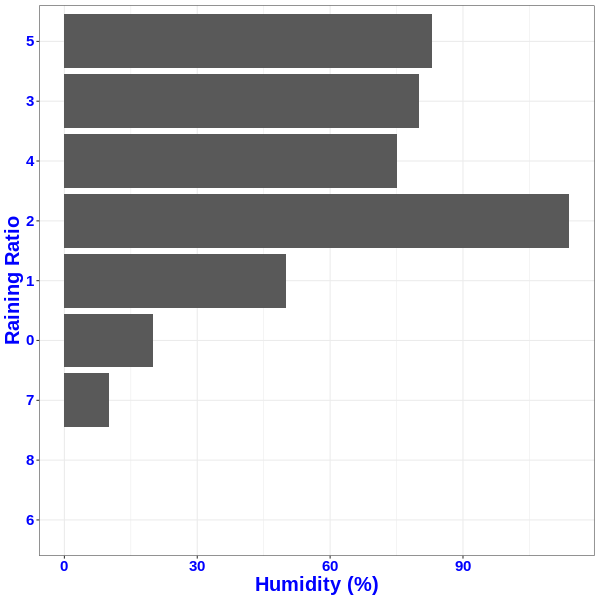

In [9]:
%%R -i df -w 600 -h 600
library(ggplot2)
ggplot(df, aes(x=reorder(Raining_ratio,humidity), y=humidity)) + 
geom_col() + 
coord_flip()+
scale_x_discrete(name="Raining Ratio")+
scale_y_continuous(name="Humidity (%)")+ theme_bw()+
theme(axis.text.x = element_text(face="bold", color="blue", size=15),
     axis.text.y = element_text(face="bold", color="blue", size=15),
     axis.title.x = element_text(face="bold", color="blue", size=20),
     axis.title.y = element_text(face="bold", color="blue", size=20))


### Reference
<https://rpy2.github.io/doc/latest/html/interactive.html>

### Supplement

`%lsmagic`  
List currently available magic functions.

`%magic_name?`  
check the documents of specific magic command